In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import math
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import random
from scipy.stats import norm
from tqdm.auto import tqdm

In [75]:
data = pd.read_excel('ne.xlsx', sheet_name='stat')

In [9]:
data = pd.read_csv('ba2.csv')

In [76]:
data

,VIP,substance P,group
0,91.91,0.00,0
1,102.94,9.24,0
2,134.68,1.25,0
3,67.28,0.00,0
4,62.08,0.00,0
...,...,...,...
70,98.90,0.00,0
71,73.16,0.00,0
72,254.35,0.00,0
73,95.59,4.38,0


In [10]:
# for i in data.columns:
#     if len(data[i].unique()) > 4:
#         print(f'"{i}",')

In [11]:
"SNP_rs896",
"SNP_rs2072100",
"SNP_rs3771829",
"SNP_rs3823082",
"Фенотип",
"Коридор",
"Симпатика",

('Симпатика',)

In [77]:
TARGET = 'group'

In [78]:
data[TARGET].unique()

array([0, 1], dtype=int64)

In [24]:
data.loc[pd.isna(data[TARGET]), TARGET] = 0

In [25]:

data[TARGET] = data[TARGET].astype (int)

In [80]:
data.columns

Index(['VIP', 'substance P', 'group'], dtype='object')

In [81]:
name_group_all = {
    'Тяжесть' : ['БАТТ', 'БАСТ'],
    'SNP_rs896' : ['TT', 'TC', 'CC'],
    'Фенотип' : ['БА с фиксированной обструкцией' ,'БА с поздним дебютом' ,'БА в сочетании с ожирением'],
    'group' : ['БА', 'контроль'],
    'Гормонозависимость' : ['есть', 'нет'],
    'ГБ' : ['есть', 'нет'],
    'Профессиональное_заболевание' : ['нет', 'есть'],
    'ИБС' : ['нет', 'есть'],
    'ГЭРБ' : ['нет', 'есть'],
    'Пол' : ['муж', 'жен'],
    'Наличие_работы' : ['нет', 'есть'],
    'Работа_в_ночную_смену' : ['нет', 'есть'],
    'Профессиональый_контакт' : ['нет', 'есть'],
    'Наличие_стресса' : ['есть', 'нет'],
    "SNP_rs896": ['TT', 'TC', 'CC'],
    "SNP_rs2072100": ['AA', 'AG', 'GG'],
    "SNP_rs3771829": ['CC', 'CG'],
    "SNP_rs3823082": ['TT', 'TC', 'CC'],
}

In [82]:
name_group_all[TARGET]

['БА', 'контроль']

In [83]:
#обозначение групп

name_group = name_group_all[TARGET]
#spisok_group
data = data.dropna(subset=[TARGET])
data = data.astype({TARGET: np.int32})
#обозначение групп

In [84]:
data[TARGET].unique()

array([0, 1])

In [31]:
data.loc[0,TARGET] = 0

In [85]:
name_group

['БА', 'контроль']

In [33]:
#data['Тяжесть'].sum()

In [34]:
# for i in range(len(data['Фенотип'])):
#     if data.loc[i,'Фенотип'] == 1:
#         data.loc[i,'Фенотип'] = 0
#     elif data.loc[i,'Фенотип'] == 2:
#         data.loc[i,'Фенотип'] = 1
#     elif data.loc[i,'Фенотип'] == 3:
#         data.loc[i,'Фенотип'] = 2
        

In [35]:
data = data[data['Тяжесть'] == 3]

KeyError: 'Тяжесть'

In [86]:
#необходимо обозначить какие переменные к какой группе относятся
scale = [
    'VIP', 'substance P'
# 'Приступов_удушья_в_день',
# 'Обострений_в_год',
# 'Длительность_БА_на_момент_исслед',
# 'САД',
# 'ДАД',
# 'ЧД',
# 'ЧСС',
# 'Пульс',
# 'Сатурация_при_поступлении',
# 'Сатурация_при_выписке',
# 'Лейкоциты_при_поступлении',
# 'Эритроциты_при_постпулении',
# 'Гемоглобин_при_поступлении',
# 'Тромбоциты_при_поступлении',
# 'Сегментоядерные_при_поступлении',
# 'Эозинофилы_при_поступлении',
# 'Моноциты_при_поступлении',
# 'Лимфоциты_при_поступлении',
# 'СОЭ_при_поступлении',
# 'Лейкоциты_при_выписке',
# 'Эритроциты_при_выписке',
# 'Гемоглобин_при_выписке',
# 'Тромбоциты_при_выписке',
# 'Сегментоядерные_при_выписке',
# 'Лимфоциты_при_выписке',
# 'СОЭ_при_выписке',
# 'БАК_посев_мокроты',
# 'IgE_общий',
# 'FeF25_при_поступлении',
# 'FeF50_при_поступлении',
# 'FeF75_при_поступлении',
# 'FeF25_при_выписке',
# 'FeF50_при_выписке',
# 'FeF75_при_выписке',
# 'ЧСС_ЭКГ',
# 'Общий_билирубин',
# 'Глюкоза_крови',
# 'Общий_белок',
# 'Холестерин',
# 'Возраст2',
# 'Рост',
# 'Вес',
# 'обострений_за_последний_год',
# 'ACQ_контроль_симптомов_БА',
# 'Самочувствие',
# 'Активность',
# 'Настроение',
# 'Экстраверсия_интроверсия',
# 'Ригидность_пластичность',
# 'Эмоционвозбудим_уравновешенность',
# 'Быстрота_реакц_медлительность',
# 'Активность_пасивность',
# 'Искренность',
# 'Реактивная_тревожность',
# 'Ситуатвиная_тревожность',
# 'Физическая_активность_PF',
# 'Физичпроблемы_в_жизнедеят_RP',
# 'Интенсивность_боли_BP',
# 'Общее_здоровье_GH',
# 'Жизненная_актвиность_VT',
# 'Социальная_активность_SF',
# 'Эмоционал_проблемы_в_жизнедеят_RE',
# 'Психическое_здоровье_MH',
# 'Физич_компонент_здор_PH',
# 'Психич_компонент_здор_MH',
# 'Наличие_вегет_дисфун',
# 'Наличие_вегет_дисфун2',
# 'Апатия1',
# 'Апатия2',
# 'Уровень_VIP',
# 'Уровень_SP',
# 'ЖЕЛ_при_поступлении',
# 'ОФВ1_при_поступлении',
# 'Индекс_Тиффно_при_поступлении',
# 'ЖЕЛ_при_выписке',
# 'ОФВ1_при_выписке',
# 'Индекс_Тиффно_при_выписке',
# 'ИМТ',
# 'VAR_mc',
# 'aVNN_mc',
# 'SDNN_mc',
# 'pNN50',
# 'rMSSD',
# 'SDNNidx_mc',
# 'SDANN_mc',
# 'VLF',
# 'LF_Симпатика',
# 'HF_Парасимпатика',
# 'nHF',
# 'CBBP',
# 'LF_HF',
]
#  categorial = [
#"Сезон_обострения_БА",
# "Худшее_время_суток_по_БА",
# "Ухудшение_состояния_в_отпуске",
# "Заболевания_ЖКТ",
# "Заболевания_ЛОРорганов",
# "Терапия_БА",
#"Профессия",
# "Форма",
# "Тяжесть",
#"Оценка_соц_бытовых_условий",
# "ДН",
# "Эмфизема",
# "ХЛС",
# "Пневмосклероз",
# "Гормонозависимость",
# "Проживание",
# "Профессиональное_заболевание",
# "ГБ",
# "ИБС",
# "ГЭРБ",
# "Симбикорт",
# "Формисонид_натив",
# "Дуоресп_Спиромакс",
# "Спирива",
# "Беродуал",
# "Форадил_комби",
# "Сальбутамол",
# "Серетид",
# "Преднизолон_per_os",
# "Антилейкотриеновые",
# "Беклометазон",
# "Эуфиллин_per_os",
# "Сингуляр",
# "Фостер",
# "Сибри",
# "Беротек",
# "Ипратерол",
# "Палочкоядерные_при_поступлении",
# "Базофилы_при_постпулении",
# "Палочкоядерные_при_выписке",
# "Эозинофилы_при_выпсике",
# "Моноциты_при_выписке",
# "Базофилы_при_выписке",
# "Наличие_суносовой_аритмии",
# "Наличие_гипертрофии_ЛЖ",
# "Эозинофилы_в_мокроте",
# "Пол",
# "Наличие_работы",
# "Работа_в_ночную_смену",
# "Профессиональый_контакт",
# "Образование",
# "Наличие_аллергической_реакции",
# "Аллерг_реакция_у_родственников",
# "Наличие_заболевания_ЖКТ",
# "Наличие_заболевания_ЛОРорганов",
# "Наличие_грибковых_заболеваний",
# "Ухудшение_состояния_при_физнагруз",
# "Ухудшение_состояния_во_время_еды",
# "Влияние_менструальногоцикла_на_БА",
# "Наличие_ОтёкаКвинке_в_анамнезе",
# "Наличие_стресса",
# "Наличие_других_заболеваний",
# "SNP_rs896",
# "SNP_rs2072100",
# "SNP_rs3771829",
# "SNP_rs3823082",
# "Фенотип",
# "Коридор",
# "Симпатика",
# ]


In [87]:
spisok_group = scale

In [89]:
#рисование графика на 2 категории
def box_plot_2_group(group):
    data_vr = data[[TARGET,group]]
    data_vr = data_vr.dropna()
    # Получить виды, отсортированные по алфавиту
    species = sorted(data_vr[TARGET].unique())
    # y_data_vr — это список длины 3, содержащий значения bill_length_mm для каждого вида.
    y_data_vr = [data_vr[data_vr[TARGET] == specie][group].values for specie in species]
 
    # Colors
    BG_WHITE = "#ffffff"
    # ffffff делый
    GREY_LIGHT = "#b4aea9"
    GREY50 = "#7F7F7F"
    BLUE_DARK = "#1B2838"
    BLUE = "#2a475e"
    BLACK = "#282724"
    GREY_DARK = "#000e28"
    RED_DARK = "#173063"
    
   
    # Горизонтальные позиции для скрипки.
    # Это произвольные числа. Например, они могли быть [-1, 0, 1].
    POSITIONS = [0, 1]
    
    # Horizontal lines надо потом вычислит формулой
    if data_vr[group].max() > 500:
        HLINES = [(math.floor(data_vr[group].min()/50))*50 , 
                  math.floor(((math.floor(data_vr[group].min()/50))*50 + (math.ceil(data_vr[group].max()/50))*50)/2), 
                  (math.ceil(data_vr[group].max()/50))*50 ]
    elif data_vr[group].max() > 100:
        HLINES = [(math.floor(data_vr[group].min()/10))*10 , 
                  math.floor(((math.floor(data_vr[group].min()/10))*10 + (math.ceil(data_vr[group].max()/10))*10)/2), 
                  (math.ceil(data_vr[group].max()/10))*10 ]
    elif data_vr[group].max() > 20: 
        HLINES = [(math.floor(data_vr[group].min()/5))*5 , 
                  math.floor(((math.floor(data_vr[group].min()/5))*5 + (math.ceil(data_vr[group].max()/5))*5)/2), 
                  (math.ceil(data_vr[group].max()/5))*5 ]    
    else:
        HLINES = [(math.floor(data_vr[group].min())) , 
                  math.floor(((math.floor(data_vr[group].min())) + (math.ceil(data_vr[group].max())))/2), 
                  (math.ceil(data_vr[group].max()))]        

    fig, ax = plt.subplots(figsize= (10, 6))

    # Немного макета -------------------------------------------------------------
    # Фоновый цвет
    fig.patch.set_facecolor(BG_WHITE)
    ax.set_facecolor(BG_WHITE)
    
    # # Горизонтальные линии, которые используются в качестве ориентира шкалы
    for h in HLINES:
        ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

    # Добавление диаграмм -------------------------------------------------------------- ----
    # Обратите внимание, что свойства медианы и прямоугольника передаются
    # как словари.

    medianprops = dict(
        linewidth=4, 
        color=GREY_DARK,
#        solid_capstyle="butt"
    )
    boxprops = dict(
        linewidth=2, 
        color=GREY_DARK,
        #hatch = '/'
    )
    whiskerprops = dict(
        linewidth=2, 
        color=GREY_DARK,
    )

    bp = ax.boxplot(
        y_data_vr, widths = 0.25,
        positions=POSITIONS, 
        patch_artist=True,
    #    showfliers = True, # Do not show the outliers beyond the caps.
    #    showcaps = False,   # Do not show the caps
        medianprops = medianprops,
        whiskerprops = whiskerprops,
        boxprops = boxprops,
        notch=True 
        #, showmeans = True,
    )
#    for box in bp['boxes']:
#    # change fill color
#    box.set(facecolor = 'green' )
#    # change hatch
#    box.set(hatch = '/')
    
    bp['boxes'][0].set_facecolor('#b3cdff')
    bp['boxes'][1].set_facecolor('#3c5e9e')
#    bp['boxes'][0].set_hatch('/')
    #Добавить метки среднего значения
    means = [y.mean() for y in y_data_vr]
    for i, mean in enumerate(means):
        # Добавить точку, представляющую среднее значение
        ax.scatter(i, mean, s=250, color=RED_DARK, zorder=3)
    
        # Добавляем строку, соединяющую среднее значение и его метку
        ax.plot([i, i + 0.25], [mean, mean], ls="dashdot", color="black", zorder=3)
    
        # Добавить метку среднего значения.
        ax.text(
            i + 0.25,
            mean,
            r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 2)),
            fontsize=13,
            va="center",
            bbox = dict(
                facecolor="white",
                edgecolor="black",
                boxstyle="round",
                pad=0.15
            ),
            zorder=10 # чтобы убедиться, что строка находится сверху
        )
    
    # Настройка макета --------------------------------------------------------------
    ax.spines["right"].set_color(GREY_LIGHT)
    ax.spines["top"].set_color(GREY_LIGHT)
  
    # Настроить цвет шипов
    ax.spines["left"].set_color(GREY_LIGHT)
    ax.spines["bottom"].set_color(GREY_LIGHT)
    
    # Настройка меток и галочек
    ax.tick_params(length=0)
    ax.set_yticks(HLINES)
    ax.set_yticklabels(HLINES, size=15)
    ax.set_ylabel(group, size=18, weight="bold")
    
    # xlabels учитывает размер выборки для каждого вида
    
    xlabels = [f"{name_group[specie]}\n(n={y_data_vr[i].size})" for i, specie in enumerate(species)]
    ax.set_xticks(POSITIONS)
    ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")
#    ax.set_xlabel("Группа", size=18, weight="bold")
 
    plt.show()
    print(f'Рисунок ?. Распределение и средние значение {group} в группах {name_group[0]} и {name_group[1]}.')
    return

In [90]:
#рисование графика на 3 и более категории
def box_plot_3_group(group):
    data_vr = data[[TARGET,group]]
    data_vr = data_vr.dropna()
    # Получить виды, отсортированные по алфавиту
    species = sorted(data_vr[TARGET].unique())
    # y_data_vr — это список длины 3, содержащий значения bill_length_mm для каждого вида.
    y_data_vr = [data_vr[data_vr[TARGET] == specie][group].values for specie in species]
 
    # Colors
    BG_WHITE = "#ffffff"
    # ffffff делый
    GREY_LIGHT = "#b4aea9"
    GREY50 = "#7F7F7F"
    BLUE_DARK = "#1B2838"
    BLUE = "#2a475e"
    BLACK = "#282724"
    GREY_DARK = "#000e28"
    RED_DARK = "#173063"
    
   
    # Горизонтальные позиции для скрипки.
    # Это произвольные числа. Например, они могли быть [-1, 0, 1].
    if len(data_vr[TARGET].unique()) == 3:
        POSITIONS = [0, 1, 2]        
    if len(data_vr[TARGET].unique()) == 4:
        POSITIONS = [0, 1, 2,3]
    if len(data_vr[TARGET].unique()) == 5:
        POSITIONS = [0, 1, 2,3,4]
    
    # Horizontal lines надо потом вычислит формулой
    if data_vr[group].max() > 500:
        HLINES = [(math.floor(data_vr[group].min()/50))*50 , 
                  math.floor(((math.floor(data_vr[group].min()/50))*50 + (math.ceil(data_vr[group].max()/50))*50)/2), 
                  (math.ceil(data_vr[group].max()/50))*50 ]
    elif data_vr[group].max() > 100:
        HLINES = [(math.floor(data_vr[group].min()/10))*10 , 
                  math.floor(((math.floor(data_vr[group].min()/10))*10 + (math.ceil(data_vr[group].max()/10))*10)/2), 
                  (math.ceil(data_vr[group].max()/10))*10 ]
    elif data_vr[group].max() > 20: 
        HLINES = [(math.floor(data_vr[group].min()/5))*5 , 
                  math.floor(((math.floor(data_vr[group].min()/5))*5 + (math.ceil(data_vr[group].max()/5))*5)/2), 
                  (math.ceil(data_vr[group].max()/5))*5 ]    
    else:
        HLINES = [(math.floor(data_vr[group].min())) , 
                  math.floor(((math.floor(data_vr[group].min())) + (math.ceil(data_vr[group].max())))/2), 
                  (math.ceil(data_vr[group].max()))]        

    fig, ax = plt.subplots(figsize= (16, 6))

    # Немного макета -------------------------------------------------------------
    # Фоновый цвет
    fig.patch.set_facecolor(BG_WHITE)
    ax.set_facecolor(BG_WHITE)
    
    # # Горизонтальные линии, которые используются в качестве ориентира шкалы
    for h in HLINES:
        ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)
    #для 2 групп
    # Добавление диаграмм -------------------------------------------------------------- ----
    # Обратите внимание, что свойства медианы и прямоугольника передаются
    # как словари.

    medianprops = dict(
        linewidth=4, 
        color=GREY_DARK,
#        solid_capstyle="butt"
    )
    boxprops = dict(
        linewidth=2, 
        color=GREY_DARK,
        )
    whiskerprops = dict(
        linewidth=2, 
        color=GREY_DARK,
    )

    bp = ax.boxplot(
        y_data_vr, widths = 0.25,
        positions=POSITIONS, 
        patch_artist=True,
    #    showfliers = True, # Do not show the outliers beyond the caps.
    #    showcaps = False,   # Do not show the caps
        medianprops = medianprops,
        whiskerprops = whiskerprops,
        boxprops = boxprops,
#         notch=True 
        #, showmeans = True,
    )
#    for box in bp['boxes']:
#    # change fill color
#    box.set(facecolor = 'green' )
#    # change hatch
#    box.set(hatch = '/')

    if len(data_vr[TARGET].unique()) == 3:
        bp['boxes'][0].set_facecolor('#A6CFD6')
        bp['boxes'][1].set_facecolor('#6888AD')
        bp['boxes'][2].set_facecolor('#48507E')
        
    if len(data_vr[TARGET].unique()) == 4:
        bp['boxes'][0].set_facecolor('#C1E1E1')
        bp['boxes'][1].set_facecolor('#7CA5BF')
        bp['boxes'][2].set_facecolor('#536592')
        bp['boxes'][3].set_facecolor('#48507E')

    if len(data_vr[TARGET].unique()) == 5:
        bp['boxes'][0].set_facecolor('#e4eaeb')
        bp['boxes'][1].set_facecolor('#C1E1E1')
        bp['boxes'][2].set_facecolor('#7CA5BF')
        bp['boxes'][3].set_facecolor('#536592')
        bp['boxes'][4].set_facecolor('#48507E')

#    bp['boxes'][0].set_hatch('/')
    #Добавить метки среднего значения
    means = [y.mean() for y in y_data_vr]
    for i, mean in enumerate(means):
        # Добавить точку, представляющую среднее значение
        ax.scatter(i, mean, s=250, color=RED_DARK, zorder=3)
    
        # Добавляем строку, соединяющую среднее значение и его метку
        ax.plot([i, i + 0.25], [mean, mean], ls="dashdot", color="black", zorder=3)
    
        # Добавить метку среднего значения.
        ax.text(
            i + 0.25,
            mean,
            r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 2)),
            fontsize=13,
            va="center",
            bbox = dict(
                facecolor="white",
                edgecolor="black",
                boxstyle="round",
                pad=0.15
            ),
            zorder=10 # чтобы убедиться, что строка находится сверху
        )
    
    # Настройка макета --------------------------------------------------------------
    ax.spines["right"].set_color(GREY_LIGHT)
    ax.spines["top"].set_color(GREY_LIGHT)
  
    # Настроить цвет шипов
    ax.spines["left"].set_color(GREY_LIGHT)
    ax.spines["bottom"].set_color(GREY_LIGHT)
    
    # Настройка меток и галочек
    ax.tick_params(length=0)
    ax.set_yticks(HLINES)
    ax.set_yticklabels(HLINES, size=15)
    ax.set_ylabel(group, size=18, weight="bold")
    
    # xlabels учитывает размер выборки для каждого вида
    
    xlabels = [f"{name_group[specie]}\n(n={y_data_vr[i].size})" for i, specie in enumerate(species)]
    ax.set_xticks(POSITIONS)
    ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")
#    ax.set_xlabel("Группа", size=18, weight="bold")
 
    plt.show()
    if len(data_vr[TARGET].unique()) == 3:
        print(f'Рисунок ?. Распределение и средние значение {group} в группах {name_group[0]},'
              f' {name_group[1]} и {name_group[2]}.')
    if len(data_vr[TARGET].unique()) == 4:
        print(f'Рисунок ?. Распределение и средние значение {group} в группах {name_group[0]},'
              f' {name_group[1]}, {name_group[2]} и {name_group[3]}.')
    if len(data_vr[TARGET].unique()) == 5:
        print(f'Рисунок ?. Распределение и средние значение {group} в группах {name_group[0]},'
              f' {name_group[1]}, {name_group[2]}, {name_group[3]} и {name_group[4]}.')
    
    return

In [91]:
#Статистики
def descriptive_statistics_for_mean(i):
    group = i
    data_vr = data[[TARGET,group]]
    data_vr = data_vr.dropna()
    species = sorted(data_vr[TARGET].unique())
    data_stat = [data_vr[data_vr[TARGET] == specie][group].values for specie in species]
    data_stat2 = {
        'Mean':[f'{data_stat[specie].mean():.2f}' for specie in species], 
        'SE':[f'{(data_stat[specie].std()/np.sqrt(len(data_stat[specie]))):.2f}' for specie in species],
        'Mean±SE' : [f'{data_stat[specie].mean():.2f}±'
                     f'{(data_stat[specie].std()/np.sqrt(len(data_stat[specie]))):.2f}' for specie in species
                    ],
        'Q1 (25%)': [f'{np.quantile([data_stat[specie]], 0.25):.2f}' for specie in species],
        'Median (50%)': [f'{np.quantile([data_stat[specie]], 0.5):.2f}' for specie in species],
        'Q3 (75%)': [f'{np.quantile([data_stat[specie]], 0.75):.2f}' for specie in species],
        'Median [Q1-Q3]' : [
            f'{np.quantile([data_stat[specie]], 0.5):.2f} [{np.quantile([data_stat[specie]], 0.25):.2f}-'
            f'{np.quantile([data_stat[specie]], 0.75):.2f}]' for specie in species
        ]
    } 

    # Creates pandas DataFrame. 
    df = pd.DataFrame(data_stat2, index =[f'{name_group[specie]}' for specie in species]) 
    display(df)
    return

In [92]:
def normal_test(i):
    alpha = 0.05
    group = i
    data_vr = data[[TARGET,group]]
    data_vr = data_vr.dropna()
    species = sorted(data_vr[TARGET].unique())
    
    data_stat = [data_vr[data_vr[TARGET] == specie][group].values for specie in species]
    
    for specie in species:
        k2, p = st.normaltest(data_stat[specie])
        if p > alpha:
            print(f'Распределение группы {name_group[specie]} соответствует нормальному распределению p={p:.4f}')
        else:
            print(f'Распределение группы {name_group[specie]} отличается от нормального распределения p={p:.4f}')

    k2, p = st.normaltest(data_vr[group])
    
    if p > alpha:
        print(f'Распределение в общей выборке соостветствует нормальному распределению p={p:.4f}')
        print()
        text = f'Рекомендуется использовать Параметрические критерии т-тест или ANOVA'
        print("\033[32m{}".format(text))
    else:
        print(f'Распределение в общей выборке отличается от нормального распределения p={p:.4f}')
        print()
        text = f'Рекомендуется использовать Непараметрические критерии(Манна-Уитни, Крускала-Уоллиса) или bootstrap'
        print("\033[31m{}".format(text))
        
    print("\033[30m".format())
    return

In [93]:
def test_2_value(i):
    alpha = 0.05
    group = i
    data_vr = data[[TARGET,group]]
    data_vr = data_vr.dropna()
    species = sorted(data_vr[TARGET].unique())
    
    statistic, p, = st.ttest_ind(data_vr[data_vr[TARGET] == species[0]][group], 
                              data_vr[data_vr[TARGET] == species[1]][group])
    print('t-тест (тест Стьюдента)')
    print(f't={statistic:.2f}, p={p:.3f}')
    
    if p > alpha:
        text = 'Различи между группами статистически не значимые'
        print("\033[31m{}".format(text))
    else:
        text = 'Между группами есть статистически значимые различия'
        print("\033[32m{}".format(text))
    print("\033[30m".format())
        
    statistic, p, = st.mannwhitneyu(data_vr[data_vr[TARGET] == species[0]][group], 
                              data_vr[data_vr[TARGET] == species[1]][group])
    print('Критерий Манна — Уитни')
    print(f'U={statistic:.2f}, p={p:.3f}')
    
    if p > alpha:
        text = 'Различи между группами статистически не значимые'
        print("\033[31m{}".format(text))
    else:
        text = 'Между группами есть статистически значимые различия'
        print("\033[32m{}".format(text))
    print("\033[30m".format())
    
#Тут пошел бутстреп

    data_column_1 = data_vr[data_vr[TARGET] == species[0]][group] # числовые значения первой выборки
    data_column_2 = data_vr[data_vr[TARGET] == species[1]][group] # числовые значения второй выборки
    
    boot_it = 10000 # количество бутстрэп-подвыборок
    statistic = np.mean # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости

    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in range(boot_it): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    print('Bootstrap (многократная генерация выборок методом Монте-Карло)')
    
#    print(f't={quants.loc[1,0]:.2f}, p={p_value:.3f}')
    print(f'Разница средних двух выборок {(data_column_1.mean() - data_column_2.mean()):.2f}')
    print(f'95%Cl (разницы) = ({round(quants[0].iloc[0],3)})-({round(quants[0].iloc[1],3)})')
    print(f'p={p_value:.3f}')
    if p_value > alpha:
        text = 'Различи между группами статистически не значимые'
        print("\033[31m{}".format(text))
    else:
        text = 'Между группами есть статистически значимые различия'
        print("\033[32m{}".format(text))
    print("\033[30m".format())
    return
          

In [94]:
def test_3_value(i):
    
    alpha = 0.05
    group = i
    data_vr = data[[TARGET,group]]
    data_vr = data_vr.dropna()
    species = sorted(data_vr[TARGET].unique())
    artr = [data_vr[data_vr[TARGET] == specie][group].values for specie in species]
    m_comp = pairwise_tukeyhsd(endog=data_vr[group], groups=data_vr[TARGET], alpha=alpha)
    
    if len(data_vr[TARGET].unique()) == 3:
        fvalue, p = st.f_oneway(artr[0], artr[1], artr[2])
        kvalue, pk = st.kruskal(artr[0], artr[1], artr[2])
    if len(data_vr[TARGET].unique()) == 4:
        fvalue, p = st.f_oneway(artr[0], artr[1], artr[2], artr[3])
        kvalue, pk = st.kruskal(artr[0], artr[1], artr[2], artr[3])
    if len(data_vr[TARGET].unique()) == 5:
        fvalue, p = st.f_oneway(artr[0], artr[1], artr[2], artr[3], artr[4])
        kvalue, pk = st.kruskal(artr[0], artr[1], artr[2], artr[3], artr[4])
    print('ANOVA')
    print(f'f={fvalue:.2f}, p={p:.3f}')
    
    if p > alpha:
        text = 'Различи между группами статистически не значимые'
        print("\033[31m{}".format(text))
    else:
        text = 'Между группами есть статистически значимые различия'
        print("\033[32m{}".format(text))
    print("\033[30m".format())
       
    print(m_comp)
    print()
    print()
    print('Tест Крускала-Уоллиса.')
    print(f'k={kvalue:.2f}, p={pk:.3f}')
    
    if p > alpha:
        text = 'Различи между группами статистически не значимые'
        print("\033[31m{}".format(text) + "\033[30m".format())
    else:
        text = 'Между группами есть статистически значимые различия'
        print("\033[32m{}".format(text) + "\033[30m".format())
       
    
    #Попарное сравнение тест Манна-Уитни с поправкой Бонферони на множественные сравнения
    print('Попарное сравнение тест Манна-Уитни с поправкой Бонферони на множественные сравнения')
    print('------------------------------------------------------------------------------------')
    print('group1    group2        U         p-adj      есть различия / нет различий')
    print('------------------------------------------------------------------------------------')
    n = len(data_vr[TARGET].unique())
    for i in range(n):
        for j in range(i+1,n):
            statistic, p, = st.mannwhitneyu(data_vr[data_vr[TARGET] == species[i]][group], 
                                            data_vr[data_vr[TARGET] == species[j]][group])
            if p > alpha:
                text = 'нет значимых различий'
                text = ("\033[31m{}".format(text))
            else:
                text = 'есть значимые различия'
                text = ("\033[32m{}".format(text))
                  
            print(f'     {i}         {j}        {statistic:.2f}    {p:.4f}     {text}' + "\033[30m".format())
            
    print('------------------------------------------------------------------------------------')

    
          

    #Тут пошел бутстреп
    boot_it = 10000 # количество бутстрэп-подвыборок
    statistic = np.mean # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
    print()
    print()
    print('Bootstrap')
    print()
    
    print('Bootstrap (многократная генерация выборок методом Монте-Карло) с поправкой Бонферони')
    print('уменьшения ложноположительных результатов')
#     print('------------------------------------------------------------------------------------')
#     print('group1 group2 Разница средних (95%Cl)   p-value  p-adj    есть различия/нет различий')
#     print('------------------------------------------------------------------------------------')
    
    

    data_column_1 = data_vr[data_vr[TARGET] == species[0]][group] # числовые значения первой выборки
    data_column_2 = data_vr[data_vr[TARGET] == species[1]][group] # числовые значения второй выборки

    n = len(data_vr[TARGET].unique())
    kol_test = 0
    for i in range(n):
        kol_test += i 

    index = np.arange(0, kol_test)
    columns = ['gr1', 'gr2', 'Δсредних', '(95%Cl)', 'p-value', 'p-adj', 'статус']
    df = pd.DataFrame(index=index, columns=columns)


    m=0
    for i in range(n):
        for j in range(i+1,n):
            
#место начала подсчета бутстрепа
            data_column_1 = data_vr[data_vr[TARGET] == species[i]][group] # числовые значения первой выборки
            data_column_2 = data_vr[data_vr[TARGET] == species[j]][group] # числовые значения второй выборки

            boot_len = max([len(data_column_1), len(data_column_2)])
            boot_data = []
            for rep in range(boot_it): # извлекаем подвыборки
                samples_1 = data_column_1.sample(
                    boot_len, 
                    replace = True # параметр возвращения
                ).values

                samples_2 = data_column_2.sample(
                    boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
                    replace = True
                ).values

                boot_data.append(statistic(samples_1-samples_2)) 
            pd_boot_data = pd.DataFrame(boot_data)

            left_quant = (1 - bootstrap_conf_level)/2
            right_quant = 1 - (1 - bootstrap_conf_level) / 2
            quants = pd_boot_data.quantile([left_quant, right_quant])

            p_1 = norm.cdf(
                x = 0, 
                loc = np.mean(boot_data), 
                scale = np.std(boot_data)
            )
            p_2 = norm.cdf(
                x = 0, 
                loc = -np.mean(boot_data), 
                scale = np.std(boot_data)
            )
            p_value = min(p_1, p_2) * 2

#конец подсчета бутстрепа
            if p_value*kol_test > alpha:
                text = 'нет разл.'
                text = ("\033[31m{}".format(text))
            else:
                text = 'есть разл.'
                text = ("\033[32m{}".format(text))
            
            
            
#             print(f'     {i}      {j}   {(data_column_1.mean() - data_column_2.mean()):.2f} '
#                 f'({round(quants[0].iloc[0],3)})-({round(quants[0].iloc[1],3)})    {p_value:.4f}  '
#                  f'{p_value*kol_test:.4f}   {text}' + "\033[30m".format())
            
            df.loc[m,'gr1'] = i
            df.loc[m,'gr2'] = j
            df.loc[m,'Δсредних'] = f'{(data_column_1.mean() - data_column_2.mean()):.2f}'
            df.loc[m,'(95%Cl)'] = f'({round(quants[0].iloc[0],2)})-({round(quants[0].iloc[1],2)})'
            df.loc[m,'p-value'] = f'{p_value:.4f}'
            df.loc[m,'p-adj'] = f'{p_value*kol_test:.4f}'
            df.loc[m,'статус'] = text + "\033[30m".format()
            
            m += 1
    print('------------------------------------------------------------------------------------')
    print(df)

#Метод Холма-Бонферрони    
    p_value = df[['p-value', 'p-adj', 'статус']]
    p_value = p_value.sort_values(['p-value'])
    p_value[['p-value', 'p-adj']] = p_value[['p-value', 'p-adj']].astype(float)
    konec = 0
    for i in range(kol_test):
        p_value.iloc[i,1] = p_value.iloc[i,0] * (kol_test - i)
        if (p_value.iloc[i,1] > alpha) or (konec == 1):
            text = 'нет разл.'
            text = ("\033[31m{}".format(text))
            konec = 1
        else:
            text = 'есть разл.'
            text = ("\033[32m{}".format(text))
        p_value.iloc[i,2] = text + "\033[30m".format()
        
    for i in range(kol_test):
        df.loc[i,'p-adj'] = p_value.loc[i,'p-adj']
        df.loc[i,'статус'] = p_value.loc[i,'статус']
    
    print()
    print()
    print('Bootstrap (многократная генерация выборок методом Монте-Карло) с поправкой Холма-Бонферрони')
    print('уменьшения ложноположительных результатов (мягче когда много групп)')
    print('------------------------------------------------------------------------------------')
    print(df)
    
#Метод Бенджамини-Хохберга    

    p_value = df[['p-value', 'p-adj', 'статус']]
    p_value = p_value.sort_values(['p-value'])
    p_value[['p-value', 'p-adj']] = p_value[['p-value', 'p-adj']].astype(float)
    konec = 0
    for i in range(kol_test):
        p_value.iloc[i,1] = p_value.iloc[i,0] * kol_test / (i+1)
        if (p_value.iloc[i,1] > alpha) or (konec == 1):
            text = 'нет разл.'
            text = ("\033[31m{}".format(text))
            konec = 1
        else:
            text = 'есть разл.'
            text = ("\033[32m{}".format(text))
        p_value.iloc[i,2] = text + "\033[30m".format()
        
    for i in range(kol_test):
        df.loc[i,'p-adj'] = p_value.loc[i,'p-adj']
        df.loc[i,'статус'] = p_value.loc[i,'статус']
    
    print()
    print()
    print('Bootstrap (многократная генерация выборок методом Монте-Карло) с поправкой Бенджамини-Хохберга')
    print('уменьшения контроля ожидаемой доли ложных отклонений гипотез (FDR) (лучше когда много очень групп)')
    print('------------------------------------------------------------------------------------')
    print(df)
        
#конец вывода результатов бустрепа            

        

        
    return


In [95]:
data

,VIP,substance P,group
0,91.91,0.00,0
1,102.94,9.24,0
2,134.68,1.25,0
3,67.28,0.00,0
4,62.08,0.00,0
...,...,...,...
70,98.90,0.00,0
71,73.16,0.00,0
72,254.35,0.00,0
73,95.59,4.38,0


VIP


UnboundLocalError: local variable 'POSITIONS' referenced before assignment

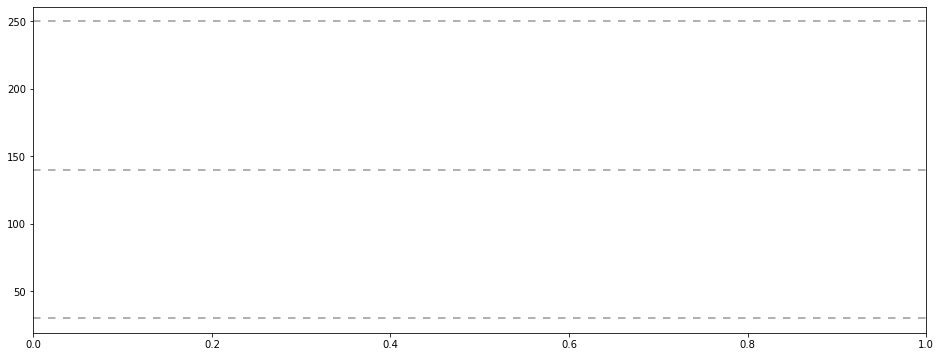

In [70]:
#для 3 групп
for i in spisok_group:
    print(i)
    box_plot_3_group(i)
    descriptive_statistics_for_mean(i)
#     normal_test(i)
    test_3_value(i)
    print()
    print('====================================================================================')


In [73]:
data

,VIP,substance P,group
0,91.91,0.00,0
1,102.94,9.24,0
2,134.68,1.25,0
3,67.28,0.00,0
4,62.08,0.00,0
5,119.12,0.00,0
6,163.30,0.00,0
7,239.48,3.13,0
8,149.41,0.00,0
9,74.26,0.00,0


VIP


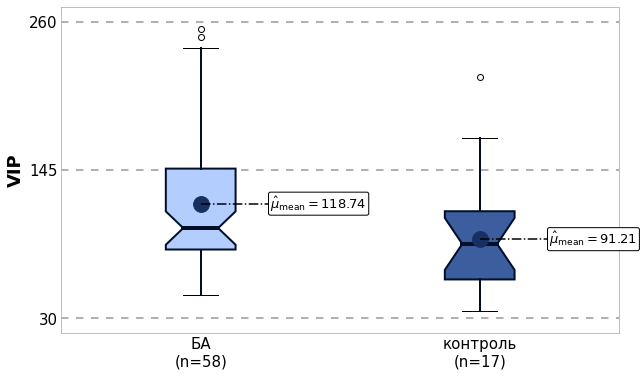

Рисунок ?. Распределение и средние значение VIP в группах БА и контроль.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БА,118.74,7.07,118.74±7.07,83.18,99.82,145.94,99.82 [83.18-145.94]
контроль,91.21,11.88,91.21±11.88,59.96,87.50,112.87,87.50 [59.96-112.87]


t-тест (тест Стьюдента)
t=1.87, p=0.066
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=647.50, p=0.051
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 27.54
95%Cl (разницы) = (8.706)-(46.181)
p=0.004
Между группами есть статистически значимые различия


substance P


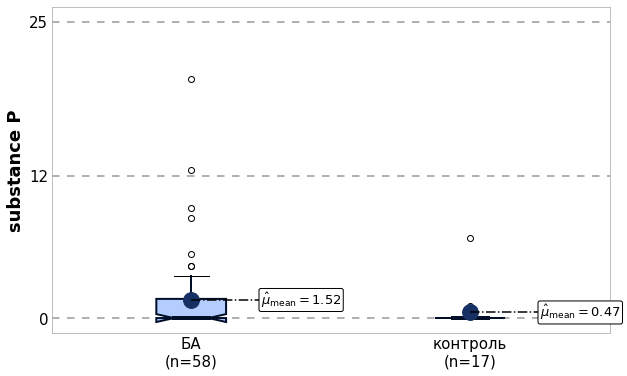

Рисунок ?. Распределение и средние значение substance P в группах БА и контроль.


,Mean,SE,Mean±SE,Q1 (25%),Median (50%),Q3 (75%),Median [Q1-Q3]
БА,1.53,0.46,1.53±0.46,0.00,0.00,1.62,0.00 [0.00-1.62]
контроль,0.47,0.39,0.47±0.39,0.00,0.00,0.00,0.00 [0.00-0.00]


t-тест (тест Стьюдента)
t=1.18, p=0.240
Различи между группами статистически не значимые

Критерий Манна — Уитни
U=570.50, p=0.218
Различи между группами статистически не значимые

Bootstrap (многократная генерация выборок методом Монте-Карло)
Разница средних двух выборок 1.05
95%Cl (разницы) = (0.139)-(2.1)
p=0.036
Между группами есть статистически значимые различия




In [96]:
#для 2 групп
for i in spisok_group:
    print(i)
    box_plot_2_group(i)
    descriptive_statistics_for_mean(i)
#     normal_test(i)
    test_2_value(i)
    print()
    print('============================================================================')

In [56]:
# def box_plot(df, x, y):
#     fig, ax = plt.subplots(figsize= (10, 5))
#     ax = sns.boxplot(
#         data=df, x=x, y=y,
#         notch=True, showmeans = True,
#         flierprops={"marker": "x"},
#         boxprops={"facecolor": (.4, .6, .8, .5)},
#         medianprops={"linewidth": "4"}, 
#         #whiskerprops = {'linewidth' : '4'} толщина уса вертикаль
#         #capprops = dict(linestyle='-', linewidth=1, color='Black'),
#         #flierprops = {'linewidth' : '4'}
#     )
#     return

In [57]:
# Получить виды, отсортированные по алфавиту
species = sorted(data["Группа"].unique())

# y_data — это список длины 3, содержащий значения bill_length_mm для каждого вида.
y_data = [data[data["Группа"] == specie][group].values for specie in species]

# Создать искаженную версию "x" (это только 0, 1 и 2)
# Подробнее об этом в бонус-треке!
jitter = 0.04
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]



KeyError: 'Группа'

In [58]:
#box_plot(data, TARGET, 'Уровень_VIP')

In [59]:
def box_plot_2_group(group):
    # Получить виды, отсортированные по алфавиту
    species = sorted(data[TARGET].unique())
    
    # y_data — это список длины 3, содержащий значения bill_length_mm для каждого вида.
    y_data = [data[data[TARGET] == specie][group].values for specie in species]
    
    # Создать искаженную версию "x" (это только 0, 1 и 2)
    # Подробнее об этом в бонус-треке!
    jitter = 0.04
    x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
    x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

    # Colors
    BG_WHITE = "#fbf9f4"
    # ffffff делый
    GREY_LIGHT = "#b4aea9"
    GREY50 = "#7F7F7F"
    BLUE_DARK = "#1B2838"
    BLUE = "#2a475e"
    BLACK = "#282724"
    GREY_DARK = "#747473"
    RED_DARK = "#850e00"
    
    # Colors taken from Dark2 palette in RColorBrewer R library
    COLOR_SCALE = ["#9e1b1b", "#1b9e22", "#1b9a9e", "#241b9e", "#9e1b97",]
    
    # Горизонтальные позиции для скрипки.
    # Это произвольные числа. Например, они могли быть [-1, 0, 1].
    POSITIONS = [0, 1]
    
    # Horizontal lines надо потом вычислит формулой

    if data[group].max() > 100:
        HLINES = [(math.floor(data[group].min()/10))*10 , 
                  math.floor(((math.floor(data[group].min()/10))*10 + (math.ceil(data[group].max()/10))*10)/2), 
                  (math.ceil(data[group].max()/10))*10 ]
    elif data[group].max() > 20: 
        HLINES = [(math.floor(data[group].min()/5))*5 , 
                  math.floor(((math.floor(data[group].min()/5))*5 + (math.ceil(data[group].max()/5))*5)/2), 
                  (math.ceil(data[group].max()/5))*5 ]    
    else:
        HLINES = [(math.floor(data[group].min())) , 
                  math.floor(((math.floor(data[group].min())) + (math.ceil(data[group].max())))/2), 
                  (math.ceil(data[group].max()))]        

    fig, ax = plt.subplots(figsize= (14, 10))

    # Немного макета -------------------------------------------------------------
    # Фоновый цвет
    fig.patch.set_facecolor(BG_WHITE)
    ax.set_facecolor(BG_WHITE)
    
    # # Горизонтальные линии, которые используются в качестве ориентира шкалы
    for h in HLINES:
        ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

    # Добавляем скрипки -------------------------------------------------------------- -----
    # bw_method="silverman" означает пропускную способность плотности ядра
    # оценка вычисляется по эмпирическому правилу Сильвермана.
    # Подробнее об этом в бонус-треке ;)

    # Вывод сохраняется в 'скрипках', используемых для настройки их внешнего вида
    #violins = ax.violinplot(
    #    y_data, 
    #    positions=POSITIONS,
    #    widths=0.45,
    #    bw_method="silverman",
    #    showmeans=False, 
    #    showmedians=False,
    #    showextrema=False
    #)

    # Настроить скрипки (удалить заливку, настроить линию и т. д.)
    #for pc in violins["bodies"]:
    #    pc.set_facecolor("none")
    #    pc.set_edgecolor(BLACK)
    #    pc.set_linewidth(1.4)
    #    pc.set_alpha(1)
    

    # Добавление диаграмм -------------------------------------------------------------- ----
    # Обратите внимание, что свойства медианы и прямоугольника передаются
    # как словари.

    medianprops = dict(
        linewidth=4, 
        color=GREY_DARK,
        solid_capstyle="butt"
    )
    boxprops = dict(
        linewidth=2, 
        color=GREY_DARK
    )

    ax.boxplot(
        y_data,
        positions=POSITIONS, 
        showfliers = False, # Do not show the outliers beyond the caps.
    #    showcaps = False,   # Do not show the caps
        medianprops = medianprops,
        whiskerprops = boxprops,
        boxprops = boxprops
    )

    # Add jittered dots ----------------------------------------------
    for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
        ax.scatter(x, y, s = 100, color=color, alpha=0.4)
    
    # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
#     fvalue, pvalue = st.f_oneway(data[data[TARGET] == species[0]][group], 
#                                  data[data[TARGET] == species[1]][group],
#                                  data[data[TARGET] == species[2]][group], 
#                                  data[data[TARGET] == species[3]][group])

    # perform multiple pairwise comparison (Tukey HSD)
#    m_comp = pairwise_tukeyhsd(endog=data[group], groups=data[TARGET], alpha=0.05)
    
    #Добавить метки среднего значения
    means = [y.mean() for y in y_data]
    for i, mean in enumerate(means):
        # Добавить точку, представляющую среднее значение
        ax.scatter(i, mean, s=250, color=RED_DARK, zorder=3)
    
        # Добавляем строку, соединяющую среднее значение и его метку
        ax.plot([i, i + 0.25], [mean, mean], ls="dashdot", color="black", zorder=3)
    
        # Добавить метку среднего значения.
        ax.text(
            i + 0.25,
            mean,
            r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 2)),
            fontsize=13,
            va="center",
            bbox = dict(
                facecolor="white",
                edgecolor="black",
                boxstyle="round",
                pad=0.15
            ),
            zorder=10 # чтобы убедиться, что строка находится сверху
        )

    # Добавить несколько сравнений p-значение для средней разницы -----------
    # Линии графика, указывающие, какие средства сравниваются
    # 'tick_len' задает длину галочки в конце каждой строки
    # дучше прибавлять по 4%

    if data[group].min() < 0:
        po = data[group].max() - data[group].min()
        p1 = 0.08
    else:
        po = data[group].max()
        p1 = 0.04
        
    p = po + po * p1
    
    if data[group].max() > 300:
        tick_len = 0.5
        pad = 0.2
    elif data[group].max() > 100:
        tick_len = 0.25
        pad = 0.1
    elif data[group].max() > 10:
        tick_len = 0.12
        pad = 0.05
    else: 
        tick_len = 0.025
        pad = 0.02

    #полоски со значимостью порядок полос 7 4 5 9 0 8 1 6 2 3  

    if m_comp.pvalues[7] <= 0.05:
        ax.plot([2, 2, 3, 3], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[7], 3)}"
        ax.text(2.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[4] <= 0.05:
        ax.plot([1, 1, 2, 2], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[4], 3)}"
        ax.text(1.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1
    
    if m_comp.pvalues[5] <= 0.05:
        ax.plot([1, 1, 3, 3], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[5], 3)}"
        ax.text(2, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[9] <= 0.05:
        ax.plot([3, 3, 4, 4], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[9], 3)}"
        ax.text(3.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1
    
    if m_comp.pvalues[0] <= 0.05:
        ax.plot([0, 0, 1, 1], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[0], 3)}"
        ax.text(0.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[8] <= 0.05:
        ax.plot([2, 2, 4, 4], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[8], 3)}"
        ax.text(3, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[1] <= 0.05:
        ax.plot([0, 0, 2, 2], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[1], 3)}"
        ax.text(1, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[6] <= 0.05:
        ax.plot([1, 1, 4, 4], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[6], 3)}"
        ax.text(2.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[2] <= 0.05:
        ax.plot([0, 0, 3, 3], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[2], 3)}"
        ax.text(1.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[3] <= 0.05:
        ax.plot([0, 0, 4, 4], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[3], 3)}"
        ax.text(2, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    # Настройка макета --------------------------------------------------------------
    # Скрыть шипы
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    
    # Настроить цвет шипов
    ax.spines["left"].set_color(GREY_LIGHT)
    ax.spines["left"].set_linewidth(2)
    ax.spines["bottom"].set_color(GREY_LIGHT)
    ax.spines["bottom"].set_linewidth(2)
    
    # Настройка меток и галочек
    ax.tick_params(length=0)
    ax.set_yticks(HLINES)
    ax.set_yticklabels(HLINES, size=15)
    ax.set_ylabel(group, size=18, weight="bold")

    # xlabels учитывает размер выборки для каждого вида
    xlabels = [f"{name_group[specie]}\n(n={y_data[i].size})" for i, specie in enumerate(species)]
    ax.set_xticks(POSITIONS)
    ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")
    ax.set_xlabel("Группа", size=18, weight="bold")
    
    # Рисунок используется для заголовка, а ось — для подзаголовка.
    # Заголовок
 

    fig.suptitle(
        f"Среднее значение {group} в экспериментальных группах",
        x = 0.122,
        y = 0.975,
        ha="left",
        fontsize=26,
    #    fontname="Lobster Two",
        color=BLUE,
        weight="bold",    
    )

    # # Подзаголовок
      
    stats = [
        f"$F_{{ANOVA}}$={round(fvalue,2)}",
        f"p={round(pvalue,3)+0.001}",
        f"Pairwise test: Tukey-test"
    ]

    
    #ax.set_title(
    #    ", ".join(stats),
    #    loc="left",
    #    ha="left",
    #    fontsize=20,
    #    color=BLUE_DARK
    #)
    
    # Примечания внизу справа
    fig.text(
        0.65,
        0.03,
        ", ".join(stats),
        fontsize=10
    )
    
    plt.show()
    
    print(f' F-Anova {round(fvalue, 2)}, p = {round(pvalue, 4)}')
    print(m_comp)

In [60]:
data2 = data.loc[:,['VIP', 'substance_P',
 'Приступов_удушья_в_день',
 'Обострений_в_год',
# 'Длительность_БА_на_момент_исслед',
# 'САД',
# 'ДАД',
# 'ЧД',
# 'ЧСС',
# 'Пульс',
 'Сатурация_при_поступлении',
# 'Сатурация_при_выписке',
# 'Лейкоциты_при_поступлении',
# 'Эритроциты_при_постпулении',
# 'Гемоглобин_при_поступлении',
# 'Тромбоциты_при_поступлении',
# 'Сегментоядерные_при_поступлении',
# 'Эозинофилы_при_поступлении',
# 'Моноциты_при_поступлении',
# 'Лимфоциты_при_поступлении',
# 'СОЭ_при_поступлении',
# 'Лейкоциты_при_выписке',
# 'Эритроциты_при_выписке',
# 'Гемоглобин_при_выписке',
# 'Тромбоциты_при_выписке',
# 'Сегментоядерные_при_выписке',
# 'Лимфоциты_при_выписке',
# 'СОЭ_при_выписке',
# 'БАК_посев_мокроты',
 'IgE_общий',
# 'FeF25_при_поступлении',
# 'FeF50_при_поступлении',
# 'FeF75_при_поступлении',
# 'FeF25_при_выписке',
# 'FeF50_при_выписке',
# 'FeF75_при_выписке',
# 'ЧСС_ЭКГ',
# 'Общий_билирубин',
# 'Глюкоза_крови',
# 'Общий_белок',
# 'Холестерин',
# 'Возраст2',
# 'Рост',
# 'Вес',
# 'обострений_за_последний_год',
 'ACQ_контроль_симптомов_БА',
# 'Самочувствие',
# 'Активность',
# 'Настроение',
# 'Экстраверсия_интроверсия',
# 'Ригидность_пластичность',
# 'Эмоционвозбудим_уравновешенность',
# 'Быстрота_реакц_медлительность',
# 'Активность_пасивность',
# 'Искренность',
# 'Реактивная_тревожность',
# 'Ситуатвиная_тревожность',
# 'Физическая_активность_PF',
# 'Физичпроблемы_в_жизнедеят_RP',
# 'Интенсивность_боли_BP',
# 'Общее_здоровье_GH',
# 'Жизненная_актвиность_VT',
# 'Социальная_активность_SF',
# 'Эмоционал_проблемы_в_жизнедеят_RE',
#  'Психическое_здоровье_MH',
#  'Физич_компонент_здор_PH',
#  'Психич_компонент_здор_MH',
#  'Наличие_вегет_дисфун',
# 'Наличие_вегет_дисфун2',
# 'Апатия1',
# 'Апатия2',
# 'Уровень_VIP',
# 'Уровень_SP',
# 'ЖЕЛ_при_поступлении',
 'ОФВ1_при_поступлении',
 'Индекс_Тиффно_при_поступлении',
# 'ЖЕЛ_при_выписке',
# 'ОФВ1_при_выписке',
# 'Индекс_Тиффно_при_выписке',
 'ИМТ',
 'VAR_mc',
 'aVNN_mc',
 'SDNN_mc',
# 'pNN50',
# 'rMSSD',
# 'SDNNidx_mc',
# 'SDANN_mc',
 'VLF',
 'LF_Симпатика',
 'HF_Парасимпатика',
 'nHF',
 'CBBP',
 'LF_HF',
]]

KeyError: "['substance_P', 'Приступов_удушья_в_день', 'Обострений_в_год', 'Сатурация_при_поступлении', 'IgE_общий', 'ACQ_контроль_симптомов_БА', 'ОФВ1_при_поступлении', 'Индекс_Тиффно_при_поступлении', 'ИМТ', 'VAR_mc', 'aVNN_mc', 'SDNN_mc', 'VLF', 'LF_Симпатика', 'HF_Парасимпатика', 'nHF', 'CBBP', 'LF_HF'] not in index"

In [ ]:
def corr_mat(data):
    sns.set_theme(style="whitegrid")

    corr_mat = data.corr().stack().reset_index(name="correlation")

    g = sns.relplot(
        data=corr_mat,
        x="level_0", y="level_1", hue="correlation", size="correlation",
        palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
        height=10, sizes=(100, 400), size_norm=(-.2, .5),
    )

    g.set(xlabel="", ylabel="", aspect="equal")
    g.despine(left=True, bottom=True)
    g.ax.margins(.03)
    for label in g.ax.get_xticklabels():
        label.set_rotation(90)
    for artist in g.legend.legendHandles:
        artist.set_edgecolor(".7")
    return

In [61]:
corr_mat(data2)

NameError: name 'corr_mat' is not defined